<a href="https://colab.research.google.com/github/caporras2288/Curso_ML_NLP202322/blob/main/S6TC1_Redes_Neuronales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pip install livelossplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras import backend as K
from livelossplot import PlotLossesKeras
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


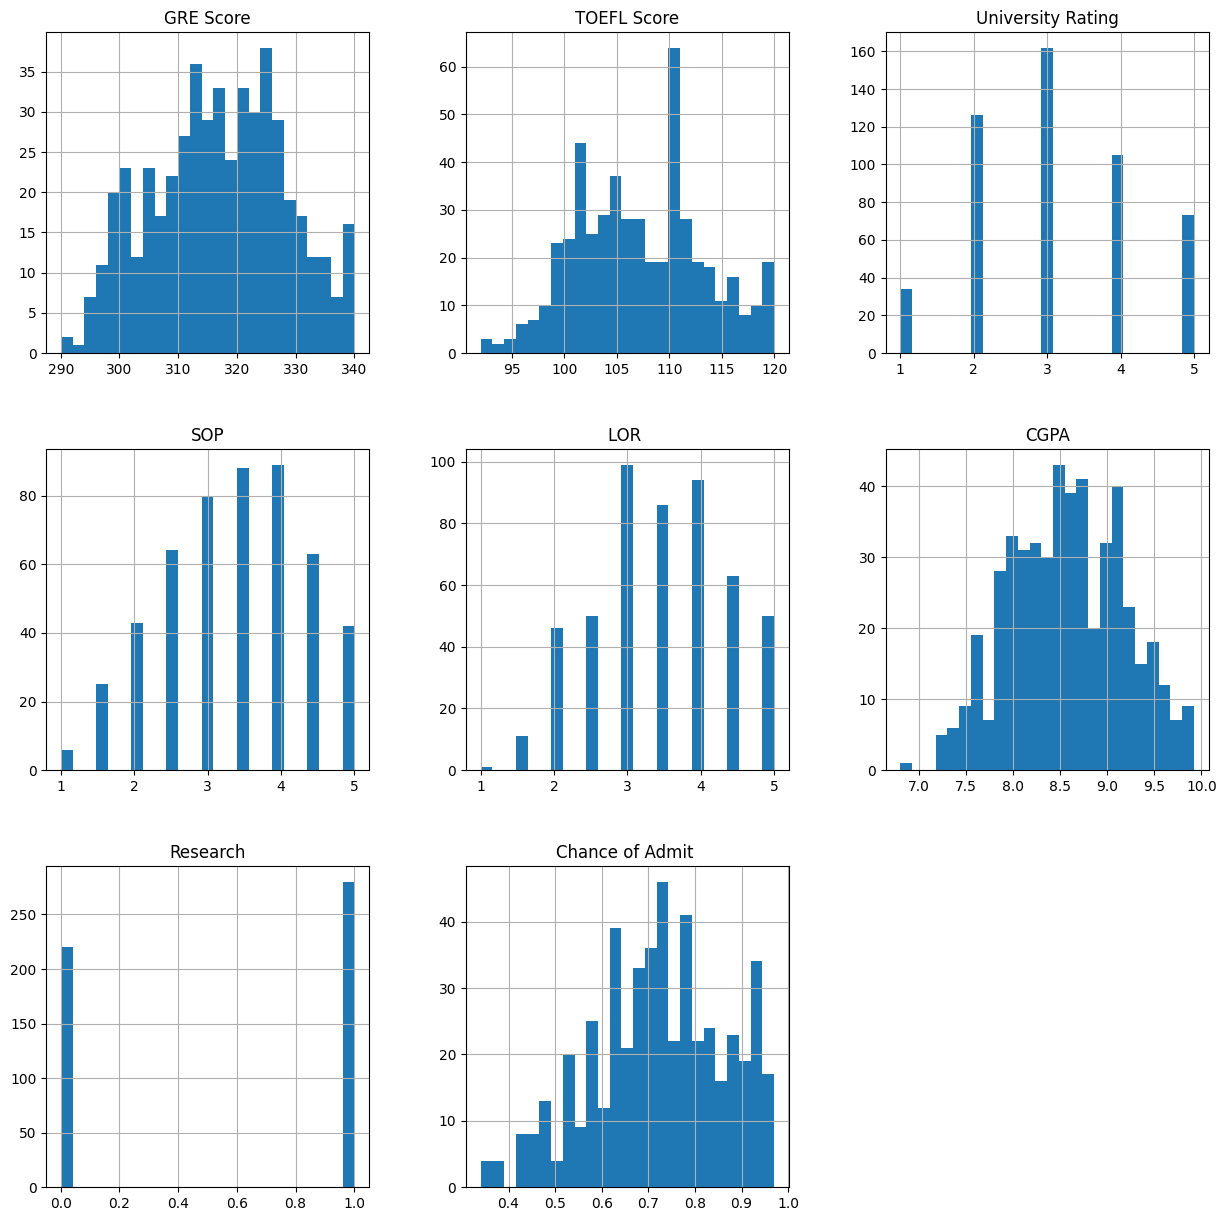

In [ ]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [ ]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [ ]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=22)

In [ ]:
# Normalización de variables predictoras (X) con la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Definición de la función StandardScaler
scaler = StandardScaler()

# Transformación de los set de entrenamiento y test
X_train = pd.DataFrame(data=scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_test = pd.DataFrame(data=scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train = np.array(X_train)
Y_train = np.array(Y_train)

X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(350, 7)
(350,)


In [ ]:
output_var = 1 

In [ ]:
# Definición de dimensiones de entrada, varaibles predictoras
dims = X_train.shape[1]
print(dims, 'input variables')

7 input variables


## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 1
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()
# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(output_var, input_shape=(dims,)))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

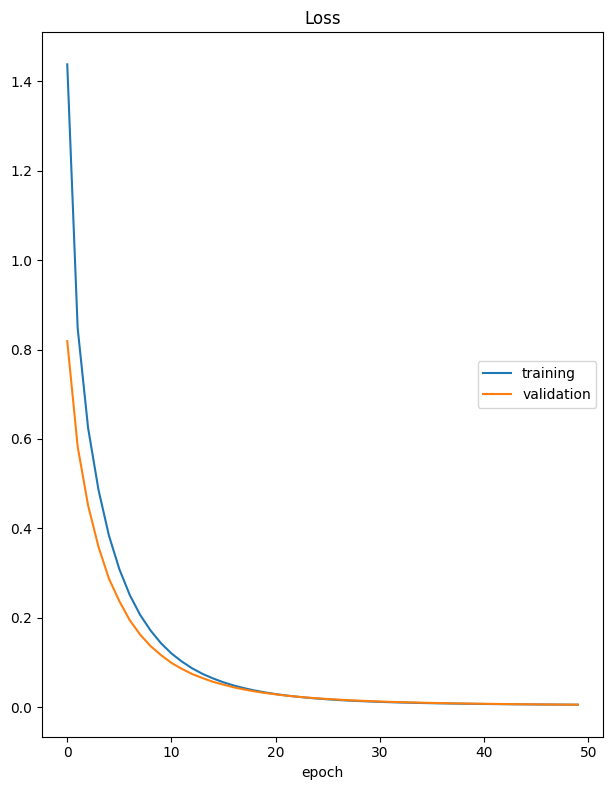

Loss
	training         	 (min:    0.005, max:    1.438, cur:    0.005)
	validation       	 (min:    0.005, max:    0.819, cur:    0.005)
11/11 [==============================] - 1s 64ms/step - loss: 0.0054 - val_loss: 0.0055


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

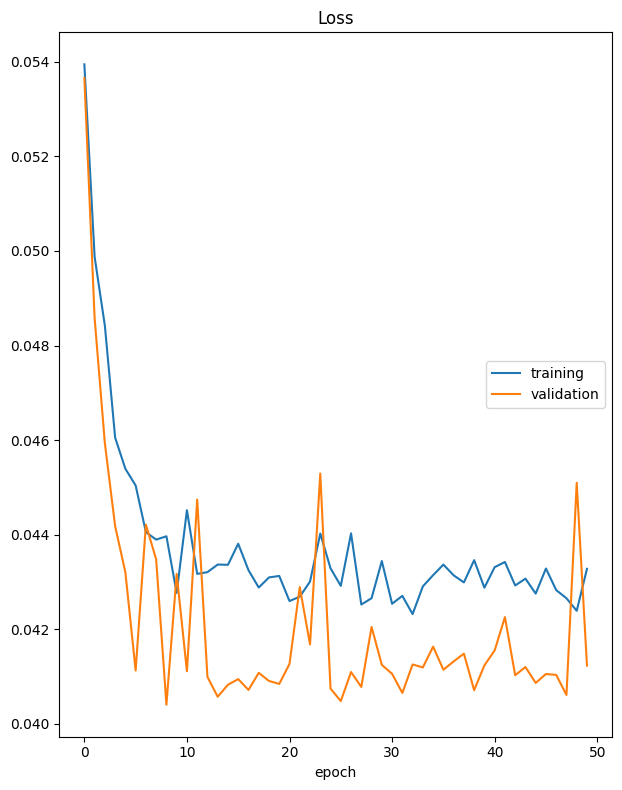

Loss
	training         	 (min:    0.042, max:    0.054, cur:    0.043)
	validation       	 (min:    0.040, max:    0.054, cur:    0.041)
11/11 [==============================] - 0s 38ms/step - loss: 0.0433 - val_loss: 0.0412


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

Como optimizador se decide utilizar gradiente descendiente dado que como se observó en clase es el método más usado en optimización con el cual se obtienen los pesos W óptimos que permitan llegar al mínimo de la función de costos. Dado que la variable objetivo es una variable continua tenemos un problema de regresión y por ende se utiliza MSE y MAE. Así mismo, se eligen 50 épocas al ser un número suficiente para que el modelo aprenda patrones en los datos, pero no tanto como para caer en el sobreajuste. En el caso de MSE, vemos como la pérdida disminuye tanto en el set de entrenamiento como de validación y alcanza estabilidad después de cierto punto. Mientras que en el caso de MAE el modelo no resulta estable. 

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
# Celda 2

K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(50, input_shape=(dims,),activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(output_var))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 3,001
Trainable params: 3,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

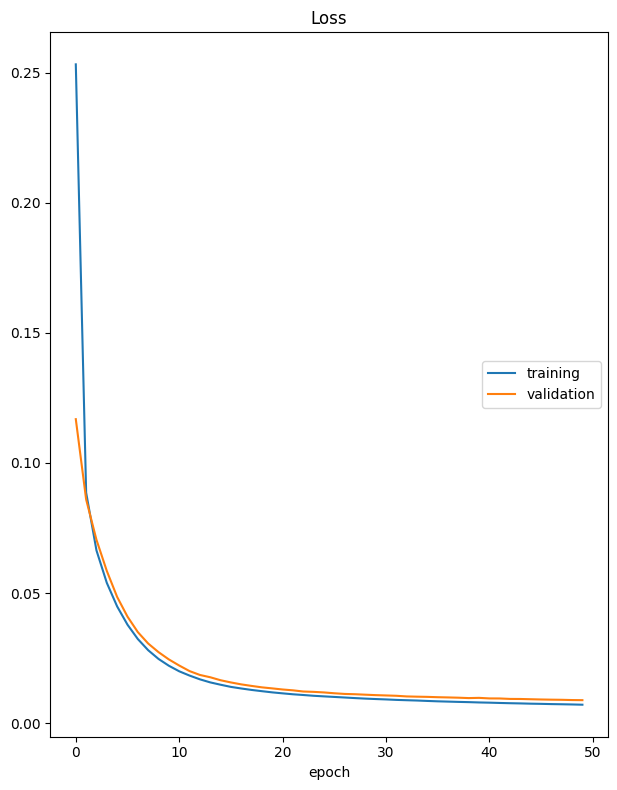

Loss
	training         	 (min:    0.007, max:    0.253, cur:    0.007)
	validation       	 (min:    0.009, max:    0.117, cur:    0.009)
11/11 [==============================] - 0s 41ms/step - loss: 0.0071 - val_loss: 0.0088


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

In [ ]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

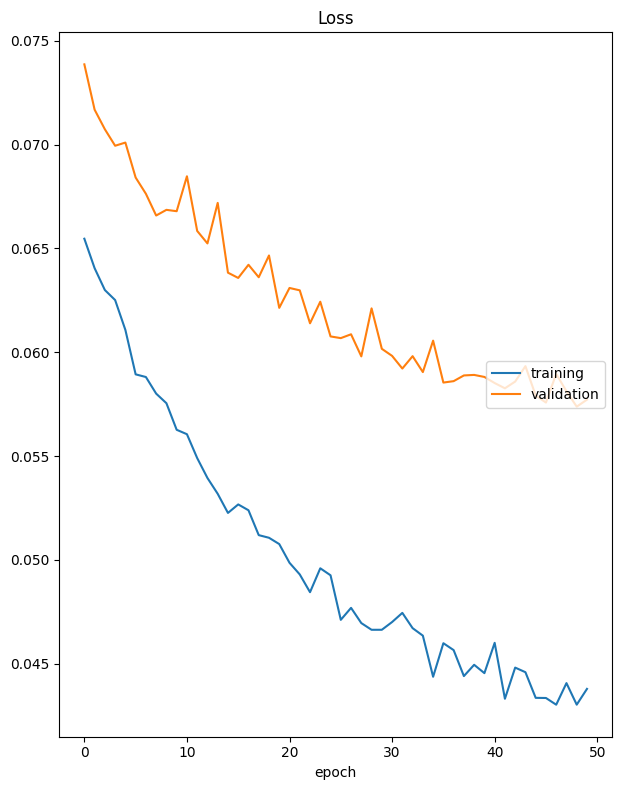

Loss
	training         	 (min:    0.043, max:    0.065, cur:    0.044)
	validation       	 (min:    0.057, max:    0.074, cur:    0.058)
11/11 [==============================] - 0s 39ms/step - loss: 0.0438 - val_loss: 0.0577


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

Se compila el modelo especificando el optimizador y la función de pérdida. En este caso, se utiliza el optimizador de **descenso de gradiente estocástico** (sgd) y la **función de pérdida** MSE (mean_squared_error) y MAE (mean_absolute_error) ya que son comúnmente utilizadas en problemas de regresión. Así mismo, se eligen 50 épocas al ser un número suficiente para que el modelo aprenda patrones en los datos, pero no tanto como para caer en el sobreajuste. En el caso de **MSE**, se observa como la pérdida disminuye tanto en el set de entrenamiento como de validación se estabiliza después de cierto punto, ademas debido a la arquietectura de la red capas y neuronas vemos valores de val_loss menores que en la red de una sola capa, en el caso del **MAE** el modelo no resulta estable aunque presente igual menores valores de val_loss.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

In [ ]:
K.clear_session()

# Definición red neuronal con la función Sequential()
model = Sequential()

# Definición de la capa densa con un tamaño de salida igual a output_var y un input_shape de dims
model.add(Dense(256, input_shape=(dims,),activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))

# Impresión de la arquitectura de la red neuronal
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               2048      
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 68,097
Trainable params: 68,097
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [ ]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

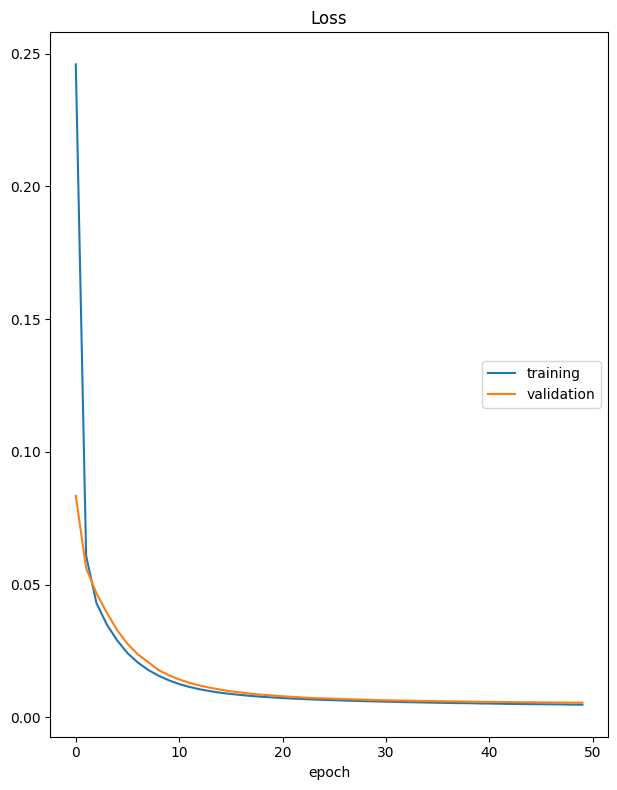

Loss
	training         	 (min:    0.005, max:    0.246, cur:    0.005)
	validation       	 (min:    0.006, max:    0.083, cur:    0.006)
11/11 [==============================] - 1s 61ms/step - loss: 0.0048 - val_loss: 0.0056


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=50, 
          callbacks=[best_model, early_stop, PlotLossesKeras()])

In [ ]:
model.compile(optimizer='sgd', loss='mean_absolute_error')

In [ ]:
# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 

In [ ]:
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
fBestModel = 'best_model.h5'
best_model = ModelCheckpoint(fBestModel, verbose=0, save_best_only=True)

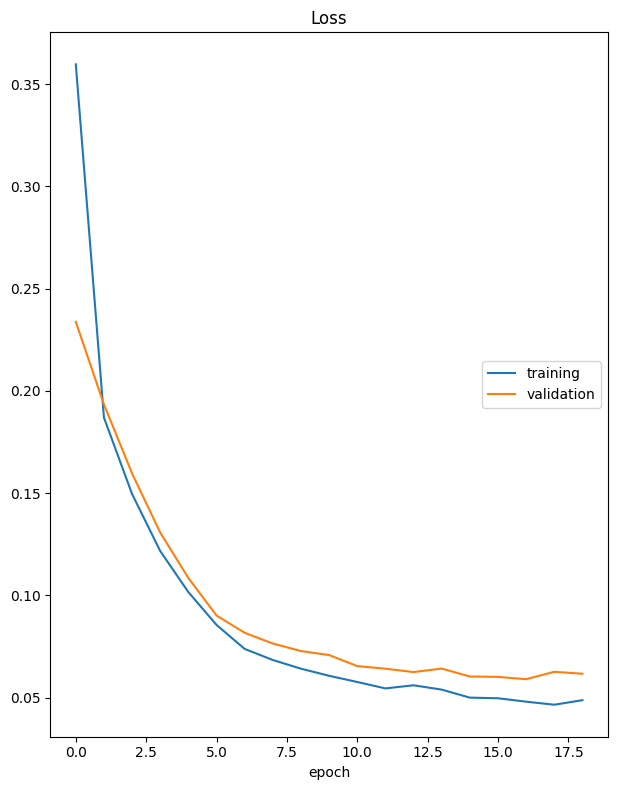

Loss
	training         	 (min:    0.047, max:    0.360, cur:    0.049)
	validation       	 (min:    0.059, max:    0.234, cur:    0.062)
11/11 [==============================] - 1s 61ms/step - loss: 0.0488 - val_loss: 0.0617
Epoch 19: early stopping


In [ ]:
# Entrenamiento de la red neuronal con 50 épocas
model.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=50, 
          callbacks=[best_model, early_stop, PlotLossesKeras()])

Se entrena el modelo especificando el optimizador y la función de pérdida. En este caso, se utiliza el optimizador de descenso de gradiente estocástico (sgd) y la función de pérdida MSE (mean_squared_error) y MAE (mean_absolute_error) ya que son comúnmente utilizadas en problemas de regresión. Así mismo, se eligen 50 épocas maximo o criterio de early stopping al ser un número suficiente para que el modelo aprenda patrones en los datos, pero no tanto como para caer en el sobreajuste. En el caso de MSE, se observa como la pérdida disminuye tanto en el set de entrenamiento como de validación se estabiliza después de cierto punto y se entrenaron las 50 epocas, agregando a la arquietectura de la red capas y neuronas una capa adicional vemos valores de val_loss ligeramente menores que en la red de 2 capas, en el caso del MAE el modelo resulta estable igualmente teniendo unos valores de perdida menores en el set de training que en el set de validacion y en este entrenamiento el etrenamiento se detuvo en la epoca 19 por el criterio de early stoppong. 

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

Text(0.5, 1.0, 'Comparación modelos por Mean Absolute Error')

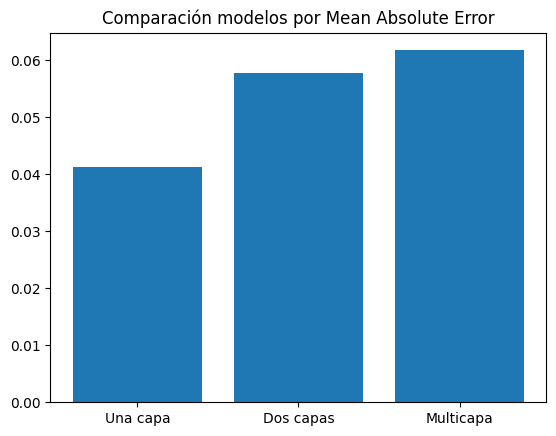

In [ ]:
# Celda 4
modelos = ['Una capa','Dos capas','Multicapa']
val_loss_mae = [0.0412,0.0577,0.0617]
val_loss_mse = [0.0055,0.0088,0.0056]

plt.bar(x=modelos,height=val_loss_mae)
plt.title("Comparación modelos por Mean Absolute Error")


Text(0.5, 1.0, 'Comparación modelos por Mean Squared Error')

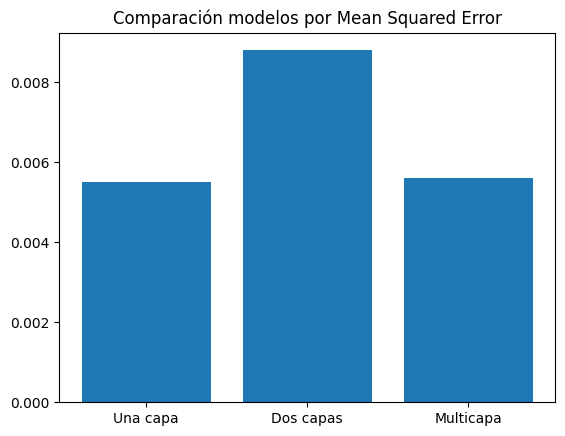

In [ ]:
plt.bar(x=modelos,height=val_loss_mse)
plt.title("Comparación modelos por Mean Squared Error")

Puede observarse que el modelo con una sola capa presenta un menor valor tanto de MAE como de MSE, por lo que es el modelo que se consideraría más conveniente para realizar la predicción. También es el modelo que presenta un menor tiempo de ejecución. Sin embargo es el modelo que presenta una mayor inestabilidad en el comportamiento del MAE, por lo que debe tenerse cuidado al momento de introducir nuevas observaciones para la predicción.

El modelo con menor rendimiento en MAE es el modelo multicapa, mientras que el modelo con menor rendimiento en MSE es el modelo de dos capas. Sin embargo, estos modelos demuestran tener mayor robustez al tener una menor inestabilidad que el modelo de una capa, por lo que permiten manejar nuevas observaciones con mayor claridad. También es importante destacar que estos modelos tienen un tiempo de cómputo ligeramente superior